In [203]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression  #ML algorithm
from sklearn.model_selection import train_test_split #spliting a datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV

%matplotlib inline


In [205]:
#Setting the working directory

os.chdir("C:/Users/Gaikwad/Documents/python_file")
print(os.getcwd())

C:\Users\Gaikwad\Documents\python_file


In [207]:

#Loading the data

train= pd.read_csv("train_cab.csv", na_values={"pickup_datetime":"43"})
test= pd.read_csv("test_cab.csv")


In [209]:

train


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [211]:
test

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...
9909,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


##Understanding the dataset


In [214]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [216]:
train.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0
16066,8.5,2011-12-14 06:24:33 UTC,-74.002111,40.729755,-73.983877,40.761975,NaN


In [218]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [220]:
train.shape

(16067, 7)

In [222]:
test.shape

(9914, 6)

In [224]:
train.dtypes  ##cheacking the datatype of the train dataset

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [226]:
test.dtypes  ##cheacking the datatype of the test dataset

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [228]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [230]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


## Data Preprocessing

 Data exploring and missing value analysis

In [234]:
#from object to numeric

train["fare_amount"] = pd.to_numeric(train["fare_amount"], errors = "coerce") #It will convert all non-numeric values with NaN

In [236]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [238]:
train.dropna(subset=["pickup_datetime"]) #Dropipng NA values in datetime column

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [240]:
#Convertng pickup_datetime from object to datetime
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format = '%Y-%m-%d %H:%M:%S UTC')

In [242]:
#we will be separating pickup_datetime function into year , month,day

train['year']=train['pickup_datetime'].dt.year
train['month']=train['pickup_datetime'].dt.month
train['Date']=train['pickup_datetime'].dt.day
train['Day']=train['pickup_datetime'].dt.dayofweek
train['Hour']=train['pickup_datetime'].dt.hour
train['Minute']=train['pickup_datetime'].dt.minute

In [244]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [246]:
test['pickup_datetime'] =  pd.to_datetime(test['pickup_datetime'], format = '%Y-%m-%d %H:%M:%S UTC')

In [248]:
#we will be separating pickup_datetime function into year , month,day

test['year']=test['pickup_datetime'].dt.year
test['month']=test['pickup_datetime'].dt.month
test['Date']=test['pickup_datetime'].dt.day
test['Day']=test['pickup_datetime'].dt.dayofweek
test['Hour']=test['pickup_datetime'].dt.hour
test['Minute']=test['pickup_datetime'].dt.minute

In [250]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int32
month                         int32
Date                          int32
Day                           int32
Hour                          int32
Minute                        int32
dtype: object

In [252]:
#removing the missing value rows
train=train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())


(16066, 13)
0


In [254]:
train['passenger_count'].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

The passenger count 5345 is not possible because the maximum number of possible passenger is SUV is 6

In [257]:
train=train.drop(train[train["passenger_count"]>6].index, axis=0)

In [259]:
train=train.drop(train[train["passenger_count"]==0].index, axis=0)

In [261]:
train["passenger_count"].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [263]:
train["passenger_count"].sort_values(ascending = True)

8862     0.12
0        1.00
9790     1.00
9791     1.00
9792     1.00
         ... 
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15989, dtype: float64

In [265]:
#removing passenger_count missing value rows
#removing the missing value rows
train=train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())


(15934, 13)
0


In [267]:
#There is one value 0.12 present in passenger_count which is not possible hence remove it as well
train=train.drop(train[train["passenger_count"]==0.12].index, axis=0)
print(train.shape)

(15933, 13)


In [269]:
#sort the fare_amount in descending order to see if there are any outliers or not
train["fare_amount"].sort_values(ascending = False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15933, dtype: float64

In [271]:
#count the number of rows where fare value is<0
Counter(train["fare_amount"]<0)

Counter({False: 15930, True: 3})

In [273]:
#removing the negative values
train=train.drop(train[train["fare_amount"]<0].index, axis=0)
train.shape

(15930, 13)

In [275]:
#chescking the min value in fare_amount variable and checking if tere is any negative values
train["fare_amount"].min()

0.0

In [277]:
#removing the values closer to zero
train=train.drop(train[train["fare_amount"]<1].index, axis=0)
train.shape
                 

(15928, 13)

In [279]:
#removing the outliers in the fare_amount especially top 3 which has huge difference
train=train.drop(train[train["fare_amount"]>454].index, axis=0)
train.shape

(15926, 13)

In [281]:
#removing the missing value rows in fare_amount
train=train.drop(train[train['fare_amount'].isnull()].index, axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(15902, 13)
0


In [283]:
train["fare_amount"].sort_values(ascending = False)

607      453.00
980      434.00
1335     180.00
1483     165.00
6630     128.83
          ...  
8596       2.50
7918       2.50
8603       2.50
15490      2.50
1427       1.14
Name: fare_amount, Length: 15902, dtype: float64

In [285]:
train["fare_amount"].describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [287]:
#latitude can be from -90 to 90
#Longitude can be from -180 to 180

#we have to remove values which are out of range
train[train["pickup_latitude"]<-90]


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [289]:
train[train["pickup_latitude"]>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [291]:
#removing out of range values for latitude
train=train.drop(train[train["pickup_latitude"]>90].index, axis=0)
train=train.drop(train[train["pickup_latitude"]<-90].index, axis=0)

In [293]:
print(train.shape)

(15901, 13)


In [295]:
#checking the pickup_longitude range <-180 
train[train["pickup_longitude"]<-180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [297]:
#checking the pickup_longitude range >180 
train[train["pickup_longitude"]>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [299]:
#checking for dropoff latitude
train[train["dropoff_latitude"]>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [301]:
train[train["dropoff_latitude"]<-90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [303]:
#checking for dropoff longitude
train[train["dropoff_longitude"]>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [305]:
train[train["dropoff_longitude"]<-180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [307]:
train.shape

(15901, 13)

In [309]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [311]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

## Data processing and cleaing is done now calculating the Haversine formula


In [314]:
# we have been given pickup-latitude, pickup_longitude and dropoff_latitude,dropoff_longitude
# now we have to calculate distance using Haversine formula by declaring new variable distance

from math import radians,cos,sin,asin,sqrt

def haversine(a):
    lon1 = a.iloc[0] 
    lat1 = a.iloc[1]
    lon2 = a.iloc[2] 
    lat2 = a.iloc[3]
    
    #"Calculating the great circle distance between the two points on earth (specified in decimal degree)"
    #Converting decimal degrees to radians
    lon1,lat1,lon2,lat2 = map(radians, [lon1,lat1,lon2,lat2])
    
    #Haversine formula
    dlon = lon2-lon1
    dlat = lat2-lat1
    a= sin(dlat/2)**2 + cos(lat1) *cos(lat2) *sin(dlon/2)**2 
    c= 2*asin(sqrt(a))
    
    #radius of earth in km is 6371
    km = 6371 * c
    return km
    

In [316]:
train["distance"] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine, axis = 1)

In [318]:
test["distance"] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine, axis = 1)

In [320]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [322]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [324]:
train.nunique()

fare_amount            459
pickup_datetime      15856
pickup_longitude     13672
pickup_latitude      14110
dropoff_longitude    13763
dropoff_latitude     14136
passenger_count          7
year                     7
month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15448
dtype: int64

In [326]:
#finding the descending order of distance to know whether the outlier is present or not
train["distance"].sort_values(ascending= False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
8982        0.000000
7009        0.000000
4769        0.000000
3711        0.000000
12478       0.000000
Name: distance, Length: 15901, dtype: float64

In [328]:
# top 23 values are really high and it's not possible cause diameter of earth is 8000 km .So if we remove these values the top will come down to 127.  

In [330]:
Counter(train["distance"]==0)

Counter({False: 15447, True: 454})

In [332]:
Counter(test["distance"]==0)

Counter({False: 9829, True: 85})

In [334]:
Counter(train["fare_amount"]==0)

Counter({False: 15901})

In [336]:
# lets remove rows who's distance is more than 127 i.e 130 approx
train=train.drop(train[train["distance"]> 130].index, axis=0)
train.shape

(15878, 14)

In [338]:
#we need to drop all these values which are equal to 0
train=train.drop(train[train["distance"]==0].index, axis=0)
train.shape

(15424, 14)

In [340]:
test=test.drop(test[test["distance"]==0].index, axis=0)
test.shape

(9829, 13)

In [342]:
#we have splitted pickup_date time into year,month,day,hour,minute so it will be irrelevant ,we will be dropping it.
#we have already calculated the distance using the pickup and dropoff latitude and longitude, so we will be dropping all those variable 
train


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16061,10.9,2009-05-20 18:56:42,-73.994191,40.751138,-73.962769,40.769719,1.0,2009.0,5.0,20.0,2.0,18.0,56.0,3.357490
16062,6.5,2014-12-12 07:41:00,-74.008820,40.718757,-73.998865,40.719987,1.0,2014.0,12.0,12.0,4.0,7.0,41.0,0.850044
16063,16.1,2009-07-13 07:58:00,-73.981310,40.781695,-74.014392,40.715527,2.0,2009.0,7.0,13.0,0.0,7.0,58.0,7.867638
16064,8.5,2009-11-11 11:19:07,-73.972507,40.753417,-73.979577,40.765495,1.0,2009.0,11.0,11.0,2.0,11.0,19.0,1.469105


In [344]:
drop_columns = ["pickup_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","Minute"]
train=train.drop(drop_columns, axis = 1)

In [346]:
train.head()

,fare_amount,passenger_count,year,month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [348]:
train.dtypes

fare_amount        float64
passenger_count    float64
year               float64
month              float64
Date               float64
Day                float64
Hour               float64
distance           float64
dtype: object

In [350]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int32
month                         int32
Date                          int32
Day                           int32
Hour                          int32
Minute                        int32
distance                    float64
dtype: object

In [352]:
drop_columns = ["pickup_datetime","pickup_latitude","pickup_longitude","dropoff_longitude","dropoff_latitude","Minute"]
test=test.drop(drop_columns, axis=1)

In [354]:
test.dtypes

passenger_count      int64
year                 int32
month                int32
Date                 int32
Day                  int32
Hour                 int32
distance           float64
dtype: object

In [356]:
#Converting variable of float datatype to int datatype
train["passenger_count"]  = train["passenger_count"].astype('int64')
train["year"]  = train["year"].astype('int64')
train["month"]  = train["month"].astype('int64')
train["Date"]  = train["Date"].astype('int64')
train["Day"]  = train["Day"].astype('int64')
train["Hour"]  = train["Hour"].astype('int64')


In [358]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [360]:
train.head()

,fare_amount,passenger_count,year,month,Date,Day,Hour,distance
0,4.5,1,2009,6,15,0,17,1.030764
1,16.9,1,2010,1,5,1,16,8.450134
2,5.7,2,2011,8,18,3,0,1.389525
3,7.7,1,2012,4,21,5,4,2.799270
4,5.3,1,2010,3,9,1,7,1.999157


## Data Visualization:

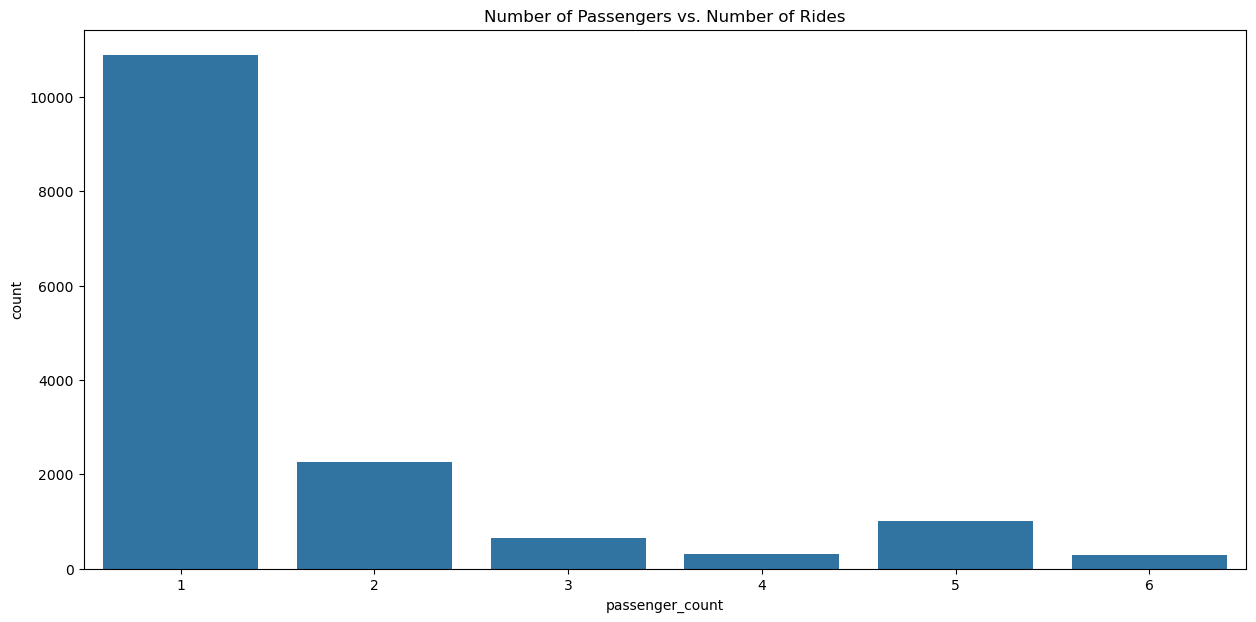

In [363]:
# Counting the number of passengers vs number of ride
plt.figure(figsize = (15,7))
sns.countplot(x = "passenger_count", data=train)
plt.title("Number of Passengers vs. Number of Rides")
plt.show()

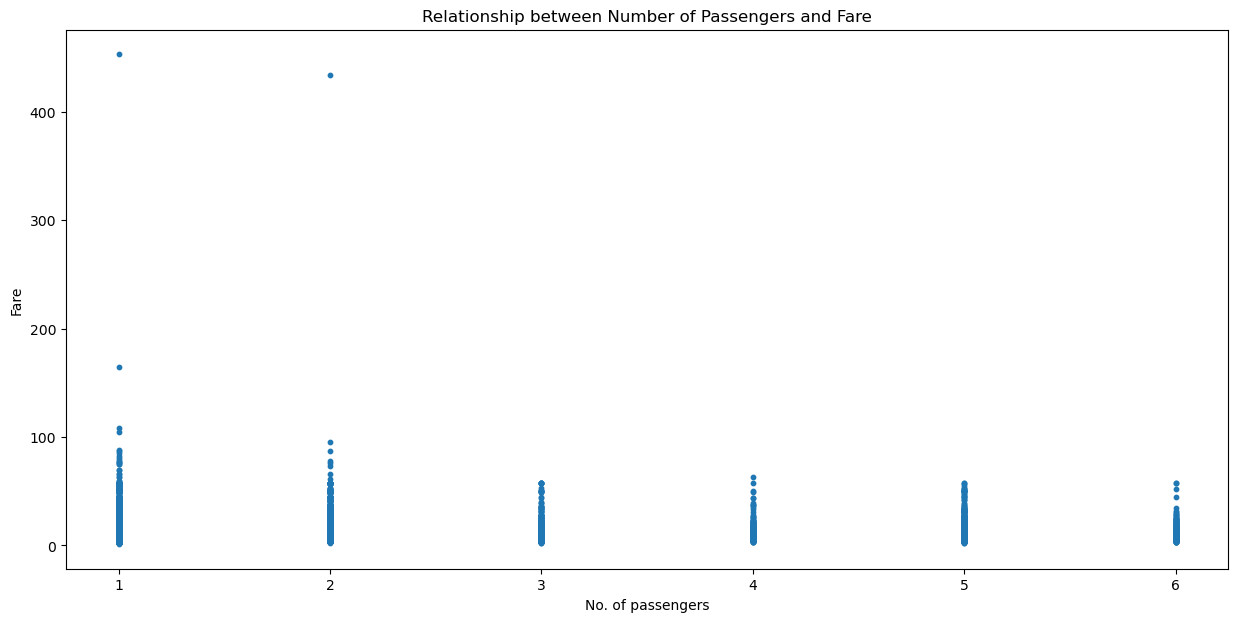

In [365]:
#Relationship between number of passengers and fare

plt.figure(figsize = (15,7))
plt.scatter(train['passenger_count'],train['fare_amount'], s=10)
plt.xlabel('No. of passengers')
plt.ylabel('Fare')
plt.title('Relationship between Number of Passengers and Fare')
plt.show()

In [367]:
# single and double passenger rides had max. fare

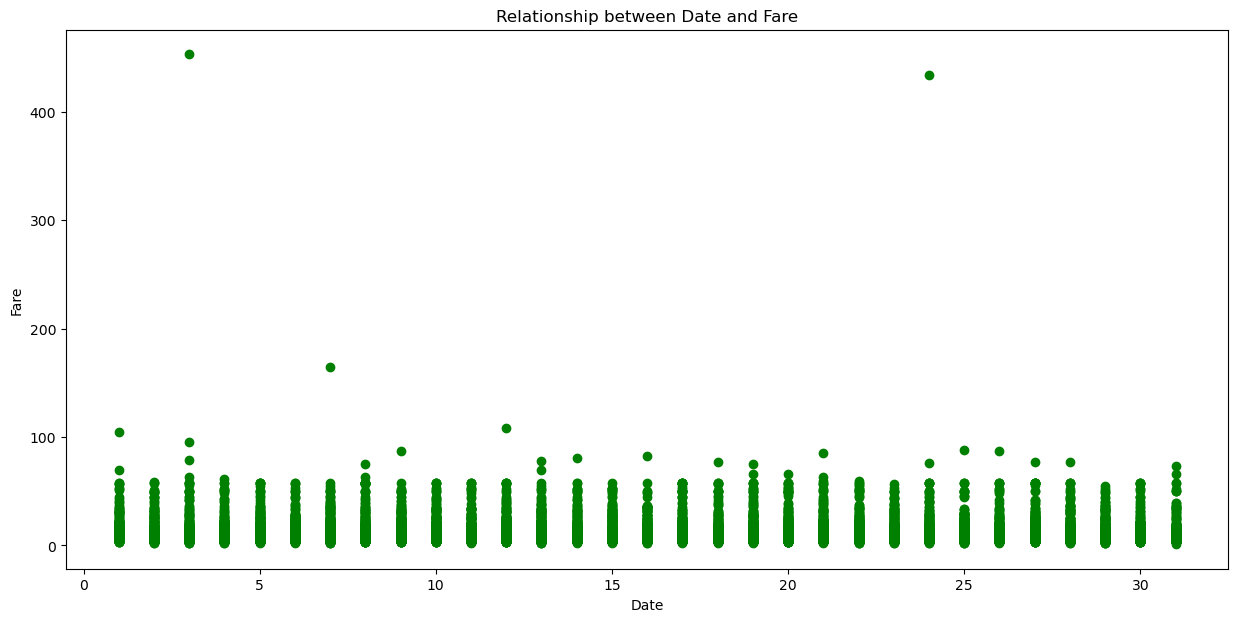

In [369]:
#Relationship between date and fare

plt.figure(figsize = (15,7))
plt.scatter(train['Date'],train['fare_amount'], c='g')
plt.xlabel('Date')
plt.ylabel('Fare')
plt.title('Relationship between Date and Fare')
plt.show()

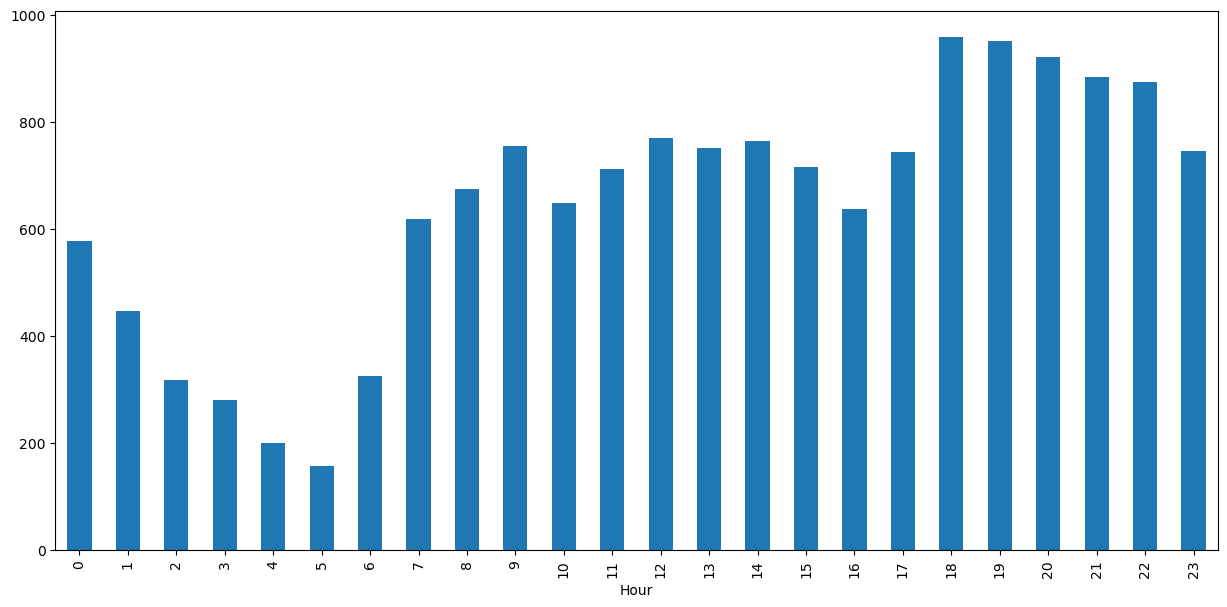

In [371]:
# Relationship between Hour of the Day and fare
plt.figure(figsize = (15,7))
train.groupby(train["Hour"])["Hour"].count().plot(kind="bar")
plt.show()

In [373]:
# Lowest number of cabs were around 5 AM and higest number was around 6-7 PM

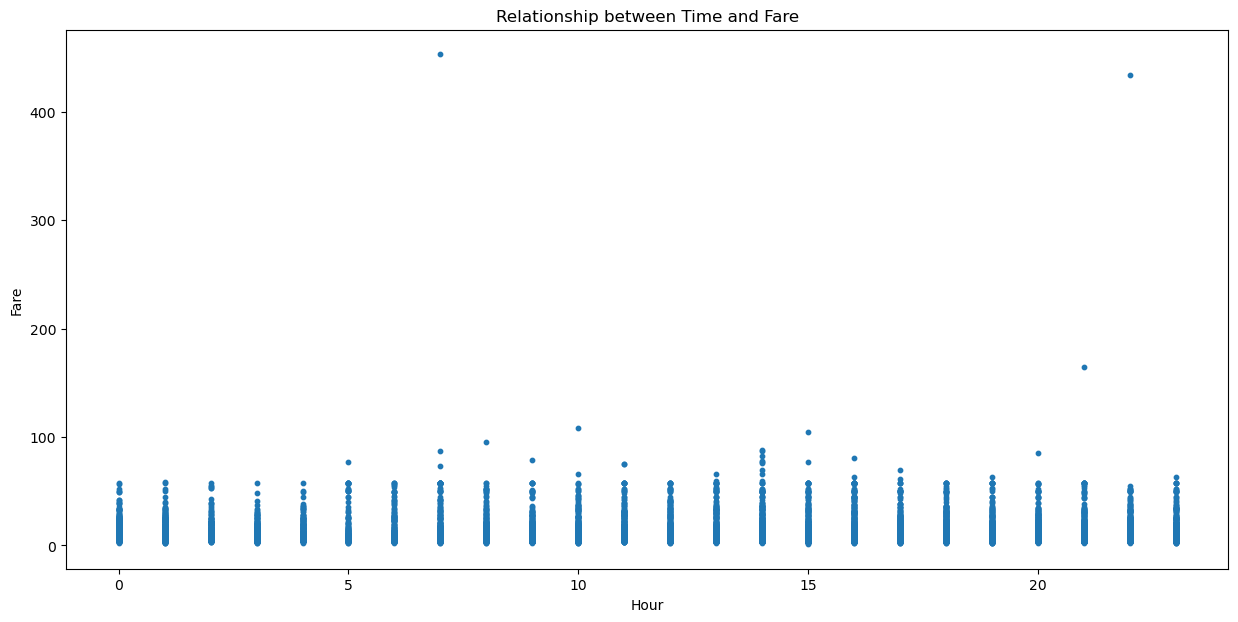

In [375]:
#Relationship between Time and fare

plt.figure(figsize = (15,7))
plt.scatter(train['Hour'],train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.title('Relationship between Time and Fare')
plt.show()

Text(0.5, 1.0, 'Relationship between Day and Fare_amount')

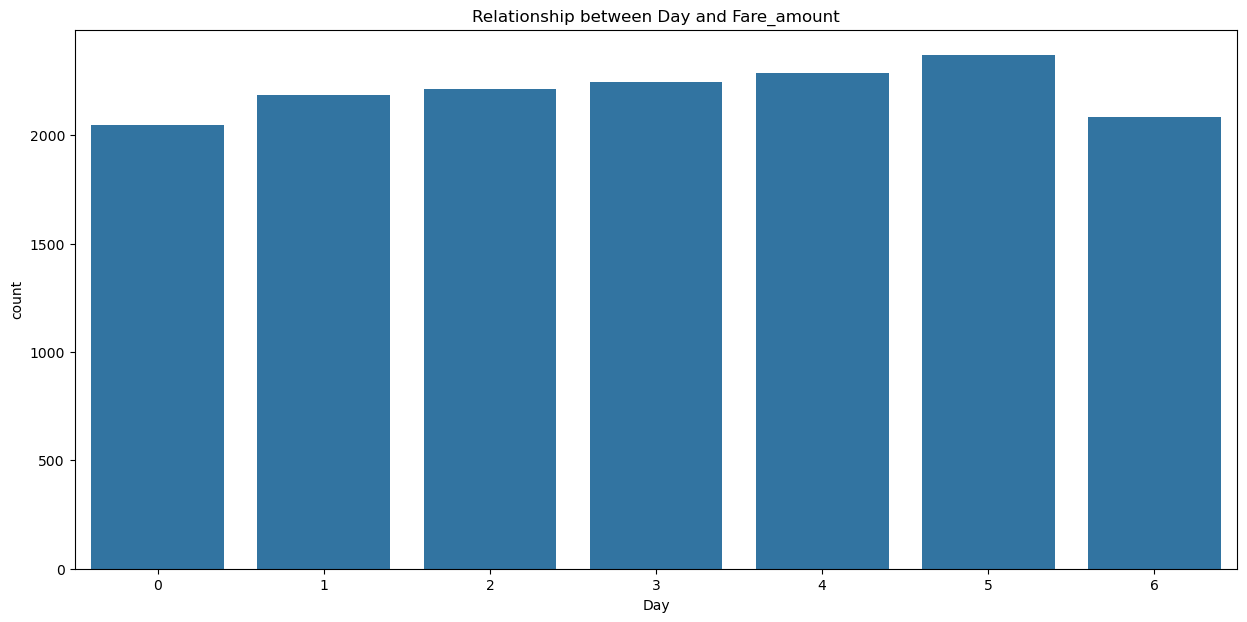

In [377]:
# Impact of the day on the fare of the cab

plt.figure(figsize = (15,7))
sns.countplot(x = "Day", data=train)
plt.title('Relationship between Day and Fare_amount')

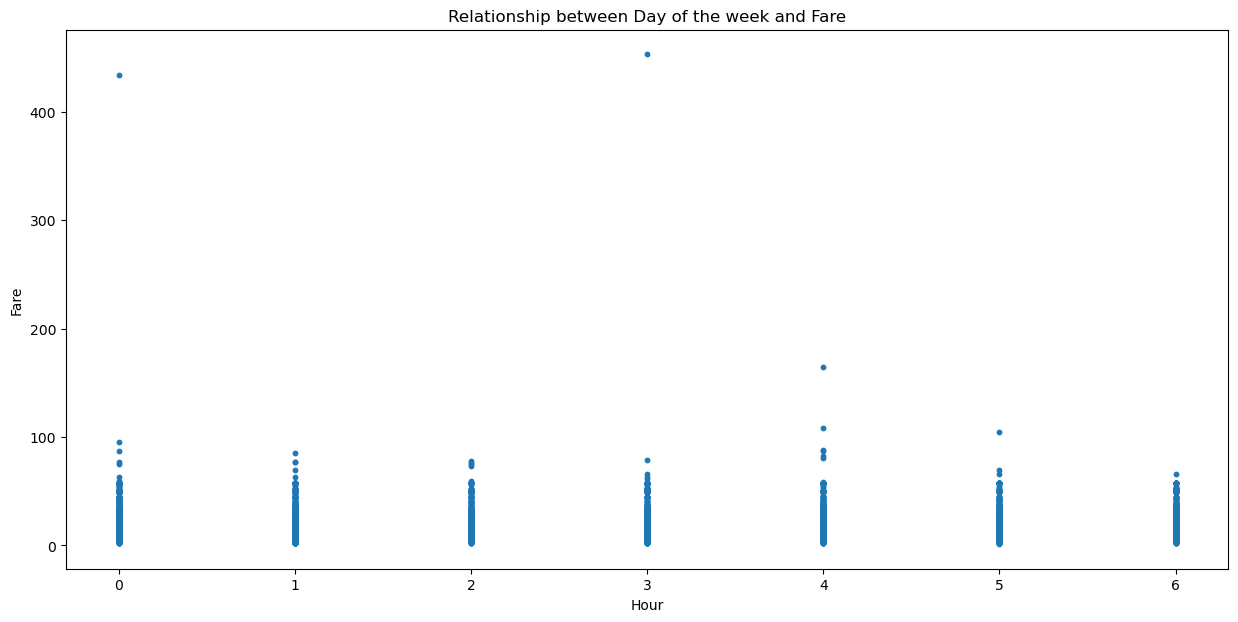

In [379]:
# Relationship between day of week and fare
plt.figure(figsize = (15,7))
plt.scatter(train['Day'],train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.title('Relationship between Day of the week and Fare')
plt.show()

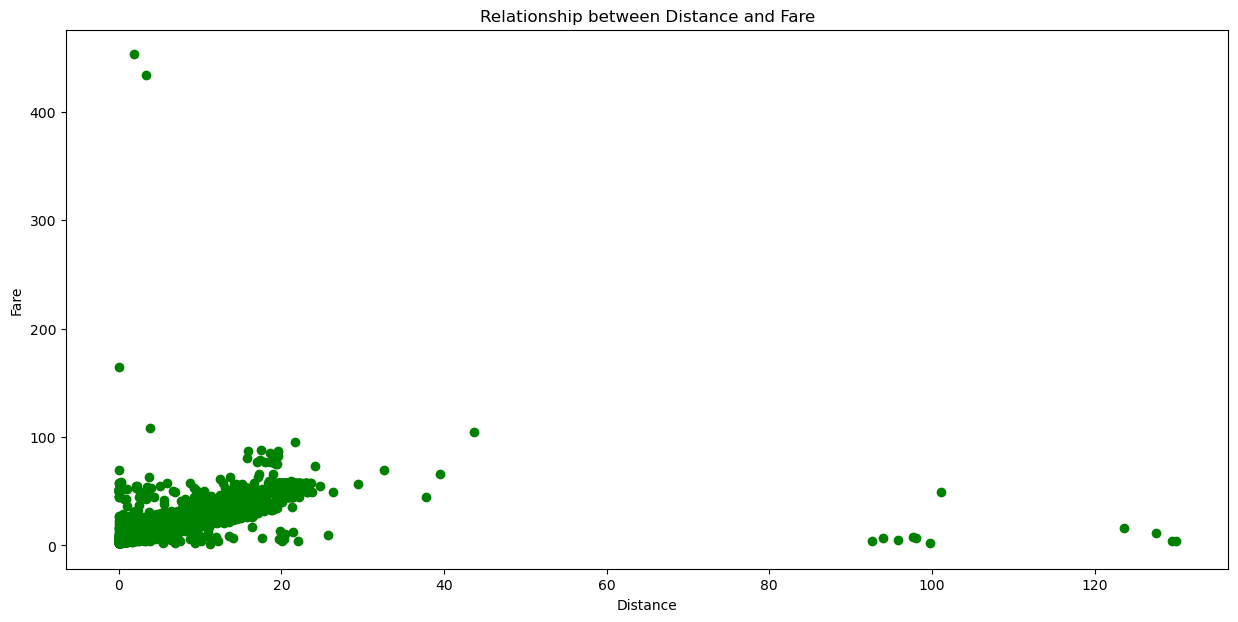

In [381]:
# Relationship between Distance and fare
plt.figure(figsize = (15,7))
plt.scatter(train['distance'], train['fare_amount'], c ='g')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.title('Relationship between Distance and Fare')
plt.show()

In [383]:
# We conclude that distance is directly proportional to fare

fare_amount


C:\Users\Gaikwad\AppData\Local\Temp\ipykernel_23340\1718151091.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins = 'auto', color= 'green')


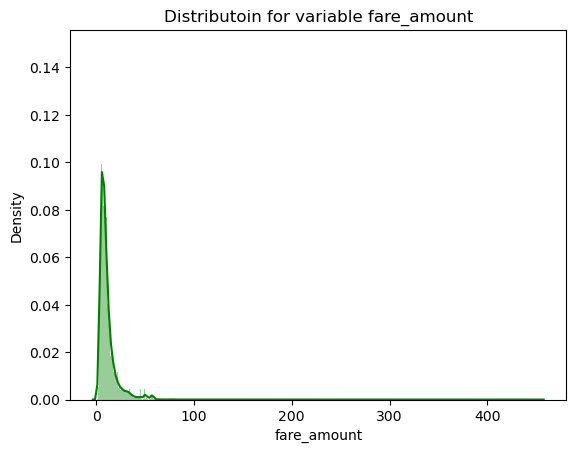

distance


C:\Users\Gaikwad\AppData\Local\Temp\ipykernel_23340\1718151091.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins = 'auto', color= 'green')


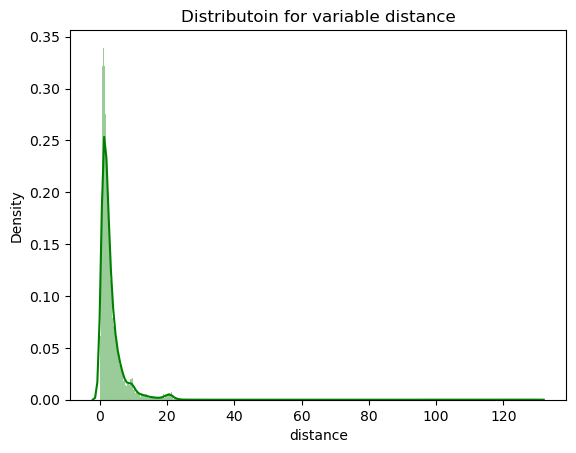

In [385]:
# Normality check for training data for cab fare and distance

for i in ['fare_amount','distance']:
    print(i)
    sns.distplot(train[i],bins = 'auto', color= 'green')
    plt.title('Distributoin for variable ' + i )
    plt.ylabel('Density')
    plt.show()

In [387]:
# Since skewness of variable is very high apply log transformation to fare_amount , distance to reduce skewness
train['fare_amount']= np.log1p(train['fare_amount'])
train['distance']= np.log1p(train['distance'])


fare_amount


C:\Users\Gaikwad\AppData\Local\Temp\ipykernel_23340\2923281304.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins = 'auto', color= 'green')


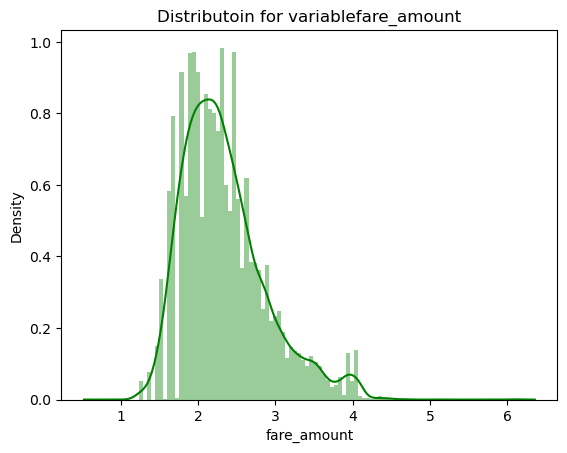

distance


C:\Users\Gaikwad\AppData\Local\Temp\ipykernel_23340\2923281304.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins = 'auto', color= 'green')


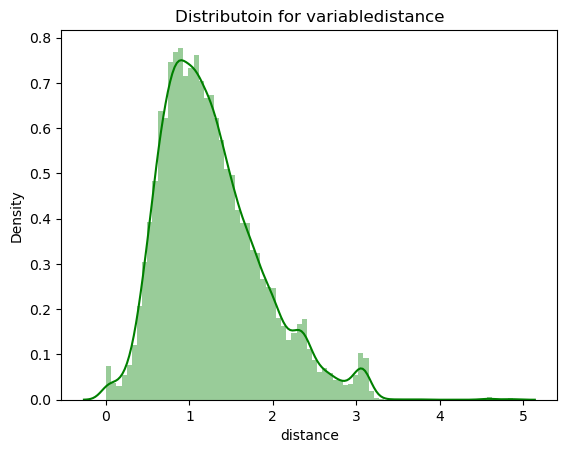

In [389]:
# Normality re-check for train data is uniformaly distributed or not

for i in ['fare_amount','distance']:
    print(i)
    sns.distplot(train[i],bins = 'auto', color= 'green')
    plt.title('Distributoin for variable' + i )
    plt.ylabel('Density')
    plt.show()

distance


C:\Users\Gaikwad\AppData\Local\Temp\ipykernel_23340\1612986027.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[i],bins = 'auto', color= 'green')


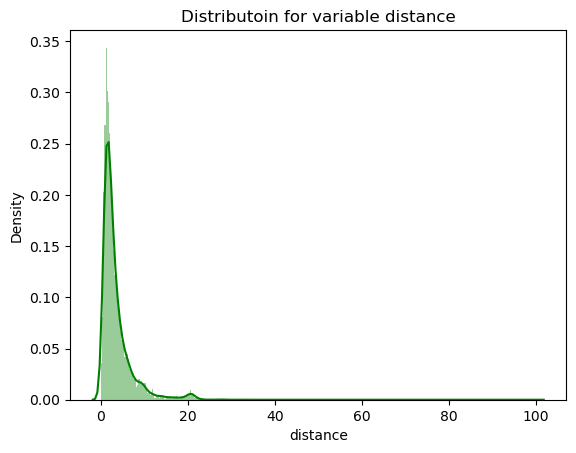

In [391]:
# Normality re-check for test data is uniformaly distributed or not

for i in ['distance']:
    print(i)
    sns.distplot(test[i],bins = 'auto', color= 'green')
    plt.title('Distributoin for variable ' + i )
    plt.ylabel('Density')
    plt.show()

In [393]:
# Since skewness of variable is very high apply log transformation.
test['distance']= np.log1p(test['distance'])

distance


C:\Users\Gaikwad\AppData\Local\Temp\ipykernel_23340\2948362390.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[i],bins = 'auto', color= 'green')


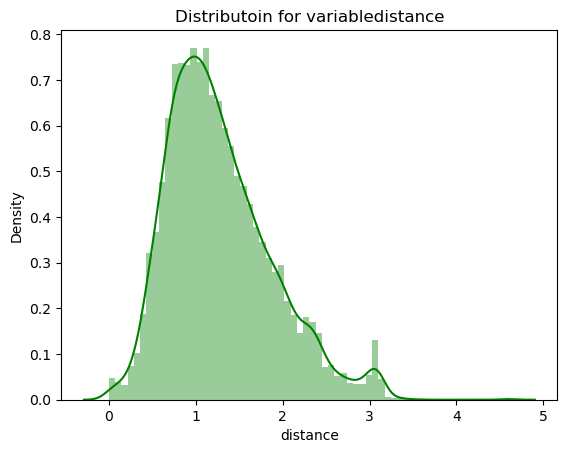

In [395]:
# Normality re-check for test data is uniformaly distributed or not

for i in ['distance']:
    print(i)
    sns.distplot(test[i],bins = 'auto', color= 'green')
    plt.title('Distributoin for variable' + i )
    plt.ylabel('Density')
    plt.show()

In [397]:
# After applying the log transformation the skewed data has already converted into normal distribution there is no need of standardization and 
# normalization. We have already got Bell curve .

## Data Modelling Applying ML Algorithm

In [400]:
# Applying train test split on dataset
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:, train.columns != 'fare_amount'], train.iloc[:,0], test_size = 0.20, random_state = 1)

In [402]:
X_train

,passenger_count,year,month,Date,Day,Hour,distance
7690,2,2012,5,16,2,6,1.691253
13018,1,2014,7,11,4,10,0.828231
12950,3,2009,6,27,5,17,0.980620
14009,1,2009,6,12,4,15,0.534072
2816,5,2013,5,18,5,20,1.141300
...,...,...,...,...,...,...,...
994,1,2009,3,24,1,11,1.465260
5454,1,2014,1,11,5,18,0.666875
12682,6,2014,1,7,1,9,1.437090
259,1,2013,5,2,3,3,0.803939


In [404]:
y_train

7690     2.370244
13018    2.014903
12950    2.014903
14009    1.629241
2816     2.890372
           ...   
994      2.687847
5454     1.704748
12682    2.917771
259      1.945910
13919    3.462606
Name: fare_amount, Length: 12339, dtype: float64

In [406]:
print(X_train.shape)
print(y_train.shape)

(12339, 7)
(12339,)


In [408]:
print(X_test.shape)
print(y_test.shape)

(3085, 7)
(3085,)


In [410]:
type(y_train)

pandas.core.series.Series

## Liner Regression 

In [413]:
# Building a Module on train dataset
fit_LR = LinearRegression().fit(X_train, y_train)

In [415]:
# Prediction on train dataset
pred_train_LR = fit_LR.predict(X_train)

In [417]:
# Prediction on test dataset
pred_test_LR = fit_LR.predict(X_test)

In [419]:
# Calculate RMSE for test dataset

In [421]:
##Calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test,pred_test_LR))

##Calculating RMSE for train data
RMSE_train_LR = np.sqrt(mean_squared_error(y_train,pred_train_LR))

In [423]:
print("Root Mean Squared Error for Training data= "+str(RMSE_train_LR))
print("Root Mean Squared Error for Test data"+ str (RMSE_test_LR))

Root Mean Squared Error for Training data= 0.2753110017967311
Root Mean Squared Error for Test data0.2454066178697766


In [425]:
# Calculate R^2 for train data

from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.749550265188041

In [427]:
r2_score(y_test, pred_test_LR)

0.7827019104296612

## Decision Tree Model

In [430]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train, y_train)

In [432]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)


In [434]:
## Calculating RMSE for train data 
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

## Calculating RMSE for test data 
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [436]:
print("Root Mean Squared Error for Training data= "+str(RMSE_train_DT))
print("Root Mean Squared Error for Test data"+ str (RMSE_test_DT))

Root Mean Squared Error for Training data= 0.29962109020770195
Root Mean Squared Error for Test data0.2867460617158617


In [438]:
# Calculate R^2 for train data

from sklearn.metrics import r2_score
r2_score(y_train, pred_train_DT)

0.7033678616157002

In [440]:
r2_score(y_test, pred_test_DT)

0.7033268167661033

## Random forest model : 

In [443]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train, y_train)

In [445]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [447]:
## calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train,pred_train_RF))
## calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test,pred_test_RF))

In [449]:
print("Root Mean Squared Error for Training data= "+str(RMSE_train_RF))
print("Root Mean Squared Error for Test data"+ str (RMSE_test_RF))

Root Mean Squared Error for Training data= 0.09570973242991399
Root Mean Squared Error for Test data0.2352400295081758


In [451]:
# Calculate R^2 for train data

from sklearn.metrics import r2_score
r2_score(y_train, pred_train_RF)

0.9697318660731903

In [453]:
r2_score(y_test, pred_test_RF)

0.8003332181310716

## Gradient Boosting

In [456]:
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [458]:
#prediction on train data
pred_train_GB = fit_GB.predict(X_train)
#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

In [460]:
## calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train,pred_train_GB))
## calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test,pred_test_GB))

In [462]:
print("Root Mean Squared Error for Training data= "+str(RMSE_train_GB))
print("Root Mean Squared Error for Test data"+ str (RMSE_test_GB))

Root Mean Squared Error for Training data= 0.22754316149645537
Root Mean Squared Error for Test data0.2273761106401373


In [464]:
# Calculate R^2 for train data

from sklearn.metrics import r2_score
r2_score(y_train, pred_train_GB)

0.8289193000175024

In [466]:
r2_score(y_test, pred_test_GB)

0.8134595437318431

## Parameter Tunning

In [469]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameter used by our current post
print("Parameters currently in use:\n")
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [471]:
## Random Hyerparameter Grid
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [473]:
## Random Search CV Random Forest Model

RRF = RandomForestRegressor(random_state=0)
n_estimators = list(range(1,20,2))
depth = list(range(1,100,2))

#Create the random grid
rand_grid = {'n_estimators':n_estimators,'max_depth':depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter =5,cv =5, random_state= 0)
randomcv_rf = randomcv_rf.fit(X_train, y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model=randomcv_rf.best_estimator_

predictions_RRF= best_model.predict(X_test)

# Calculate R^2 

RRF_r2= r2_score(y_test, predictions_RRF)

# Calculating RMSE

RRF_rmse = np.sqrt(mean_squared_error(y_test, predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance: ')
print('Best_parameters= ', view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE=' ,RRF_rmse)

Random Search CV Random Forest Regressor Model Performance: 
Best_parameters=  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.8.
RMSE= 0.2373410611350033


In [474]:
# Applying Random Search CV on  Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameter used by our current post
print("Parameters currently in use:\n")
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [477]:
## Random Search CV  Gradient Boosting Regressor

gb =  GradientBoostingRegressor(random_state=0)
n_estimators = list(range(1,20,2))
depth = list(range(1,100,2))

#Create the random grid
rand_grid = {'n_estimators':n_estimators,'max_depth':depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter =5,cv =5, random_state= 0)
randomcv_gb = randomcv_gb.fit(X_train, y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model= randomcv_gb.best_estimator_

predictions_GB= best_model.predict(X_test)

# Calculate R^2 
GB_r2= r2_score(y_test, predictions_GB)

# Calculating RMSE
GB_rmse = np.sqrt(mean_squared_error(y_test, predictions_GB))

print('Random Search CV  Gradient Boosting Regressor Model Performance: ')
print('Best_parameters= ', view_best_params_gb)
print('R-squared = {:0.2}.'.format(GB_r2))
print('RMSE=' ,GB_rmse)

Random Search CV  Gradient Boosting Regressor Model Performance: 
Best_parameters=  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.77.
RMSE= 0.25226513358657066


In [479]:
##( Random Search) Grid Search CV  on Random Forest

GRF =  GradientBoostingRegressor(random_state=0)
n_estimators = list(range(11,20,1))
depth = list(range(5,15,2))

#Create the grid_search
grid_search = {'n_estimators':n_estimators,'max_depth':depth}

gridcv_rf = GridSearchCV(GRF, param_grid = grid_search,cv =5 )
gridcv_RF = gridcv_rf.fit(X_train, y_train)
predictions_GRF = gridcv_RF.predict(X_test)

view_best_params_GRF = gridcv_RF.best_params_

best_model= gridcv_RF.best_estimator_

predictions_GRF= best_model.predict(X_test)

# Calculate R^2 
GRF_r2= r2_score(y_test, predictions_GRF)

# Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test, predictions_GRF))

print('Grid Search CV  Gradient Boosting Regressor Model Performance: ')
print('Best_parameters= ', view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE=' ,GRF_rmse)

Grid Search CV  Gradient Boosting Regressor Model Performance: 
Best_parameters=  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.8.
RMSE= 0.23724212611002213


In [481]:
## (Random Search) Grid Serach CV  on Gradient Boosting

GGB =  GradientBoostingRegressor(random_state=0)
n_estimators = list(range(11,20,1))
depth = list(range(5,15,2))

#Create the grid_search
grid_search = {'n_estimators':n_estimators,'max_depth':depth}

gridcv_gb = GridSearchCV(GGB, param_grid = grid_search,cv =5 )
gridcv_GB = gridcv_gb.fit(X_train, y_train)
predictions_GGB = gridcv_GB.predict(X_test)

view_best_params_GGB = gridcv_GB.best_params_

best_model= gridcv_GB.best_estimator_

predictions_GGB= best_model.predict(X_test)

# Calculate R^2 
GGB_r2= r2_score(y_test, predictions_GGB)

# Calculating RMSE
GGB_rmse = np.sqrt(mean_squared_error(y_test, predictions_GGB))

print('Grid Search CV  Gradient Boosting Regressor Model Performance: ')
print('Best_parameters= ', view_best_params_GGB)
print('R-squared = {:0.2}.'.format(GGB_r2))
print('RMSE=' ,GGB_rmse)

Grid Search CV  Gradient Boosting Regressor Model Performance: 
Best_parameters=  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.8.
RMSE= 0.23724212611002213


## Prediction of fare from provided test dataset

In [486]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest Regressor
regr = RandomForestRegressor(random_state=0)

# Define the parameter grid
n_estimators = list(range(11, 20, 1))
depth = list(range(5, 15, 2))
grid_search = {'n_estimators': n_estimators, 'max_depth': depth}

# Perform Grid Search with 5-fold Cross-Validation
gridcv_rf = GridSearchCV(regr, param_grid=grid_search, cv=5)
gridcv_rf = gridcv_rf.fit(X_train, y_train)

# View the best parameters found by Grid Search
view_best_params_GRF = gridcv_rf.best_params_
print("Best parameters found: ", view_best_params_GRF)

# Ensure the test set has the same columns as the training set
missing_cols = set(X_train.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0  # or use a more appropriate default value

# Reorder columns to match the training data
test = test[X_train.columns]

# Apply the model to the test data
prediction_GRF_test = gridcv_rf.predict(test)



Best parameters found:  {'max_depth': 7, 'n_estimators': 15}


In [488]:
# Output the predictions
print("Predictions on test data: ", prediction_GRF_test)

Predictions on test data:  [2.37543359 2.39413478 1.68070503 ... 4.00620024 3.30834716 2.04017073]


In [490]:
test["Predicted_Fare"]= prediction_GRF_test

In [492]:
test.head()

,passenger_count,year,month,Date,Day,Hour,distance,Predicted_Fare
0,1,2015,1,27,1,13,1.200946,2.375434
1,1,2015,1,27,1,13,1.231205,2.394135
2,1,2011,10,8,5,11,0.481579,1.680705
3,1,2012,12,1,5,21,1.085538,2.218272
4,1,2012,12,1,5,21,1.854312,2.786595


In [494]:
test.to_csv("test.csv")